### 回归
为一个或者多个自变量和因变量的关系建模

- 如果自变量x与因变量y存在线性关系，则y可以表示为x中元素的加权和，允许包含观测值的一些噪声
- 噪声遵循正态分布

线性回归的目标是找到最优的权重向量w和偏置b，使得预测值y_hat与实际值y之间的误差最小化


### 仿射变换
仿射变换是将输入向量映射到输出向量的线性变换。仿射变换的公式为：
y = Ax + b
其中，A为仿射变换的矩阵，b为仿射变换的偏置向量。

公式展开形式为：
y1 = a11 * x1 + a12 * x2 + b1

y2 = a21 * x1 + a22 * x2 + b2

具备线性变换（加权求和）和平移操作（b）的变换就是仿射变换。


### 特征向量和权重向量
当输入包含d个特征时，预测值为：
y = w1 * x1 + w2 * x2 + ... + wd * xd + b

其中，w1, w2, ..., wd为权重向量，b为偏置向量。

以上公式的点积形式为：
y = w.T * x + b


### 观测误差
即便特征与标签的潜在关系是线性的，但是数据本身往往存在误差，即观测误差。

假设观测误差为ε，则预测值为：
y = w.T * x + b + ε


### 损失函数
损失函数一般用于度量预测值与真实值的差异，常用的损失函数有均方误差（MSE）、交叉熵损失（Cross Entropy Loss）等。

基本属性：
- 通常采用非负函数来刻画损失，数值越小表示越接近真实值
- 当预测值与实际值完全一致时，损失值为0

对于回归任务来说，通常使用平方误差作为损失函数，即预测值与真实值的差平方和。

公式为 L = 1/2 * (y - y_pred)^2

上面的1/2是为了求导时方便，加上不影响损失的数学定义。

整个数据集层面你的损失函数定义为：
$$
\begin{align}
L &= \frac{1}{2N} \sum_{i=1}^N (y_i - y_{pred_i})^2
\end{align}
$$


###  小批量随机梯度下降算法
算法流程为：
- 样本抽样：每次迭代随机选取固定数量的训练样本，组成小批量β
- 梯度计算：计算小批量的平均损失对模型参数的导数（梯度）
- 参数更新：将梯度乘以学习率η（yita），从当前的数值中减去该数值，沿着负梯度方向更新。


计算过程为：
$$
\begin{align}
\theta_{t+1} &= \theta_t - \eta \frac{1}{N} \sum_{i=1}^N \nabla_\theta L(x_i, y_i)
\end{align}
$$

 其中，
- $\theta_t$ 表示第t个时间步的模型参数
- $\eta$ 表示学习率
- $N$ 表示小批量的样本数量
- $\nabla_\theta L(x_i, y_i)$ 表示第i个样本的梯度，即损失函数对模型参数的导数
- $\frac{1}{N}$ 表示对损失函数求平均值


### 初始化参数和超参数
假设模型参数为w=[w1,w2], 设置为w=[0,0]

偏置项设置为b=0

学习率η=0.01（小学习率保证稳定）

批量大小N=3

损失函数为均方误差MSE

比如，第一次拿到3个样本:
- x1=2, x2=2, y=11
- x1=1, x2=3, y=12
- x1=3, x2=1, y=10

对于线性回归模型，预测值为：$\hat{y} = w_1 x_1 + w_2 x_2 + b$

损失函数为均方误差：$L = \frac{1}{2N} \sum_{i=1}^N (y_i - \hat{y}_i)^2$

梯度计算公式为：
$$
\begin{align}
\nabla_{w_1} L &= \frac{1}{N} \sum_{i=1}^N (\hat{y}_i - y_i) \cdot x_{1i} = \frac{1}{3} \sum_{i=1}^3 (0 - y_i) \cdot x_{1i} \\
&= \frac{1}{3}[(0-11) \cdot 2 + (0-12) \cdot 1 + (0-10) \cdot 3] \\
&= \frac{1}{3}[(-11) \cdot 2 + (-12) \cdot 1 + (-10) \cdot 3] \\
&= \frac{1}{3}[-22 + (-12) + (-30)] \\
&= \frac{-64}{3} \approx -21.33 \\
\nabla_{w_2} L &= \frac{1}{N} \sum_{i=1}^N (\hat{y}_i - y_i) \cdot x_{2i} = \frac{1}{3} \sum_{i=1}^3 (0 - y_i) \cdot x_{2i} \\
&= \frac{1}{3}[(0-11) \cdot 2 + (0-12) \cdot 3 + (0-10) \cdot 1] \\
&= \frac{1}{3}[(-11) \cdot 2 + (-12) \cdot 3 + (-10) \cdot 1] \\
&= \frac{1}{3}[-22 + (-36) + (-10)] \\
&= \frac{-68}{3} \approx -22.67 \\
\nabla_b L &= \frac{1}{N} \sum_{i=1}^N (\hat{y}_i - y_i) = \frac{1}{3} \sum_{i=1}^3 (0 - y_i) \\
&= \frac{1}{3}[(0-11) + (0-12) + (0-10)] \\
&= \frac{1}{3}[-11 + (-12) + (-10)] \\
&= \frac{-33}{3} = -11
\end{align}
$$

参数更新计算过程：
$$
\begin{align}
w_1^{(new)} &= w_1^{(old)} - \eta \nabla_{w_1} L = 0 - 0.01 \cdot (-21.33) = 0 + 0.2133 = 0.2133 \\
w_2^{(new)} &= w_2^{(old)} - \eta \nabla_{w_2} L = 0 - 0.01 \cdot (-22.67) = 0 + 0.2267 = 0.2267 \\
b^{(new)} &= b^{(old)} - \eta \nabla_b L = 0 - 0.01 \cdot (-11) = 0 + 0.11 = 0.11
\end{align}
$$

然后带入新的样本进行计算。



### 参数和超参数

超参数的定义：超参数是模型训练过程中需要设置的参数，比如学习率、权重衰减、批次大小等等。这些参数不仅过模型学习，是人为设定的。

参数：在模型训练过程中，模型会根据训练数据进行学习，并生成一组参数。这些参数是模型在训练过程中学习到的，比如权重矩阵、偏置向量等等。


超参数调优：选择超参数的过程成为超参数调优，可以尝试网络搜索、贝叶斯优化等策略确定参数取值。



### 矢量化运算

将元素循环的标量运算，转化成cpu/gpu处理的向量运算，借助线性代数库完成运算，而不是使用开销较高的循环操作，这就是矢量化运算。


In [1]:
import torch

### 对比矢量化运算和循环运算的效率

n = 100000
a = torch.zeros(n)
b = torch.ones(n)

def time_wrapper(func):
    def wrapper(*args, **kwargs):
        import time
        start = time.time()
        func(*args, **kwargs)
        end = time.time()
        print(f"{func.__name__} time: {end - start}")
    return wrapper

@time_wrapper
def loop_add():
    c = torch.zeros(n)
    for i in range(n):
        c[i] = a[i] + b[i]
    return  c

@time_wrapper
def vector_add():
    c = torch.add(a, b)
    return c

print("loop_add")
loop_add()
print("vector_add")
vector_add()

loop_add
loop_add time: 0.5537528991699219
vector_add
vector_add time: 0.0014781951904296875


### 从线性回归到深度网络
人脑单个神经元的结构为：
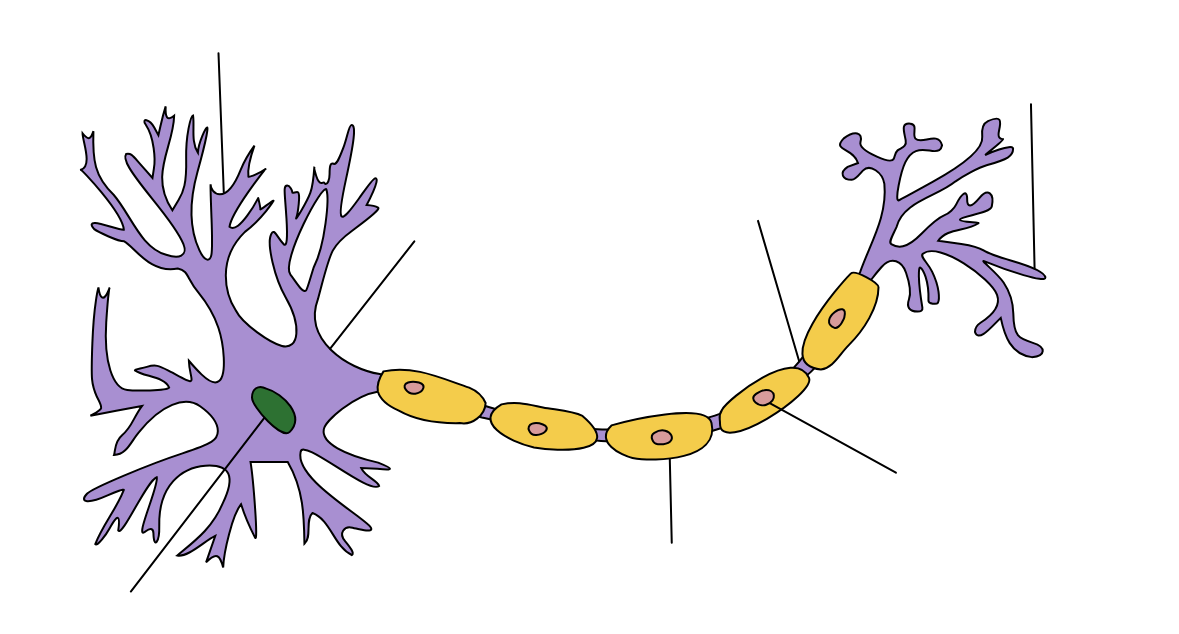

我们用线性模型来说明：
- 树突接收到输入信号xi
- 信息通过与突触权重wi相乘，界定输入的激励/抑制影响。
- 多元输入以加权和的形式$y = \sum_{i=1}^{d} w_i x_i + b$ 汇聚到细胞核。
- 将这些信息y进一步处理，通常会使用一个非线性函数σ(y)进行处理
- 处理的信息发送到轴突，要么到达目的，要么通过树突传入下一个神经元
